In [3]:
import sys
import os
sys.path.append("../../src/")
#Imports
import numpy as np
import scipy as sp
import numpy.linalg as la
import matplotlib.pyplot as plt
#Custom made imports
import single_particle_sector as sps
from time import time


In [ ]:
#Ground State Fidelity
def overlap(U,V):
    L = U.shape[0]//2
    U = U[:,:L]
    V = V[:,:L]
    overlap_matrix = U.conj().T @ V
    return la.det(overlap_matrix)
#Model Parameters
L = 64
J = -1
h0 = 0
hf = 2
taus = [1,5,10,25,100]
N_steps = 1000
#Time Evolved States:
Ut_tau = []
GS_T_tau = []
times_tau =[]
for tau in taus:
    times = np.linspace(0,tau,N_steps)

    Ut = sps.TFIM_time_evolve(N_steps,tau,h0,hf,J,L)
    #Ground States
    GS_T = []
    for ti in range(N_steps):
        h = sps.h_t(times[ti],tau,h0,hf)
        H = sps.H_bdg(h,L,J)
        E,V = la.eigh(H)
        GS_T.append(V)
    Ut_tau.append(Ut)
    GS_T_tau.append(GS_T)
    times_tau.append(times)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


/Users/kristianmunnikhuis/Desktop/subsystem_loschmidt_echo/scripts/cluster_jobs/../../src/single_particle_sector.py:173: ComplexWarning: Casting complex values to real discards the imaginary part
  C[nx,ny] = M[Bx,Ay]


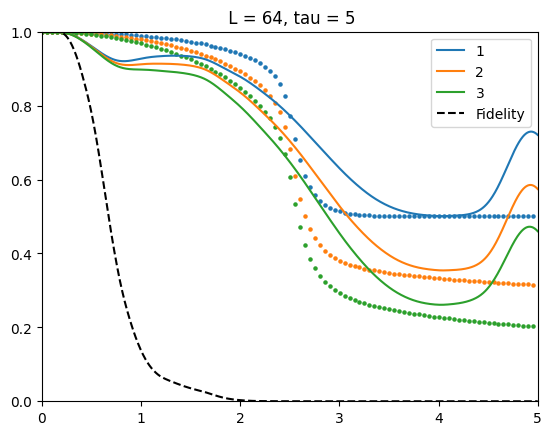

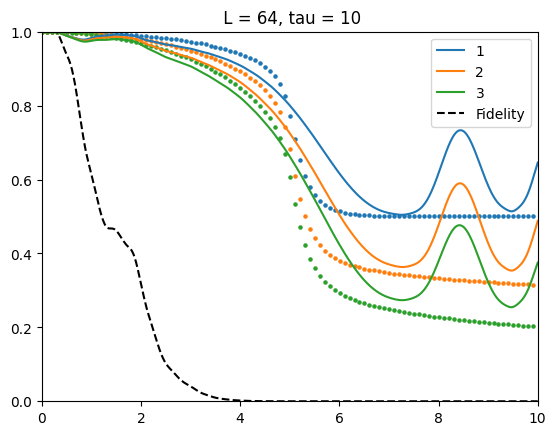

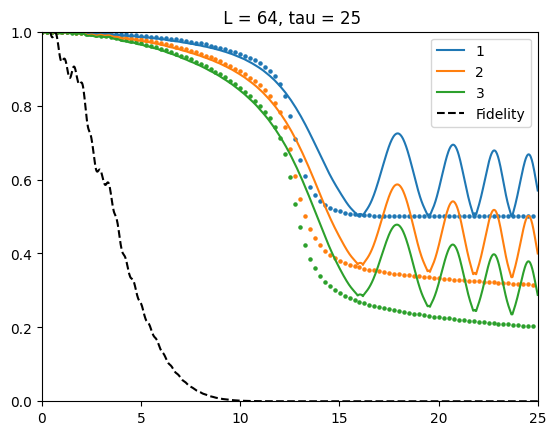

In [6]:
ns = [1,2,3]
#i = time step
for j in range(1,len(taus)):
    plt.figure()    
    G_t =[sps.G_tfim(Ut_tau[j][ti][:,:L]) for ti in range(N_steps) ]
    G_gs = [sps.G_tfim(GS_T_tau[j][ti][:, :L]) for ti in range(N_steps)]
    fidelity = [np.abs(overlap(Ut_tau[j][ti],GS_T_tau[j][0]))**2 for ti in range(N_steps)]

    for n in ns:
        P_t= [sps.P_n(n,Gi,L) for Gi in G_t]
        P_gs=[sps.P_n(n,Gi,L) for Gi in G_gs]
        plt.scatter(times_tau[j][::10],P_gs[::10], s = 5)
        plt.plot(times_tau[j],P_t, label = f"{n}")


    ##Plotting

    
    
    plt.plot(times_tau[j],fidelity, label =f"Fidelity", color = "black",linestyle="--" )

    plt.title(f" L = {L}, tau = {taus[j]}")

    plt.legend()
    plt.xlim(times_tau[j][0],times_tau[j][-1])
    plt.ylim(0,1)
    plt.savefig(f"tau={taus[j]}.png")
    plt.show()